In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import torch
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image

In [2]:
def convert_to_pil_image(batch):
    for cam in batch:
        row = make_grid(cam, nrow=cam.shape[0], padding=10, normalize=True)
        combined_grid = torch.cat((combined_grid, row), dim=1) if 'combined_grid' in locals() else row
    return to_pil_image(combined_grid)

# Unity

In [3]:
from unity import UnityDataset, UnityDataModule

In [4]:
unitydataset = UnityDataset(epoch_length=100, port=8093, size=(448, 448))
unitydatamodule = UnityDataModule(unitydataset, batch_size=5, num_workers=0, shuffle=True)

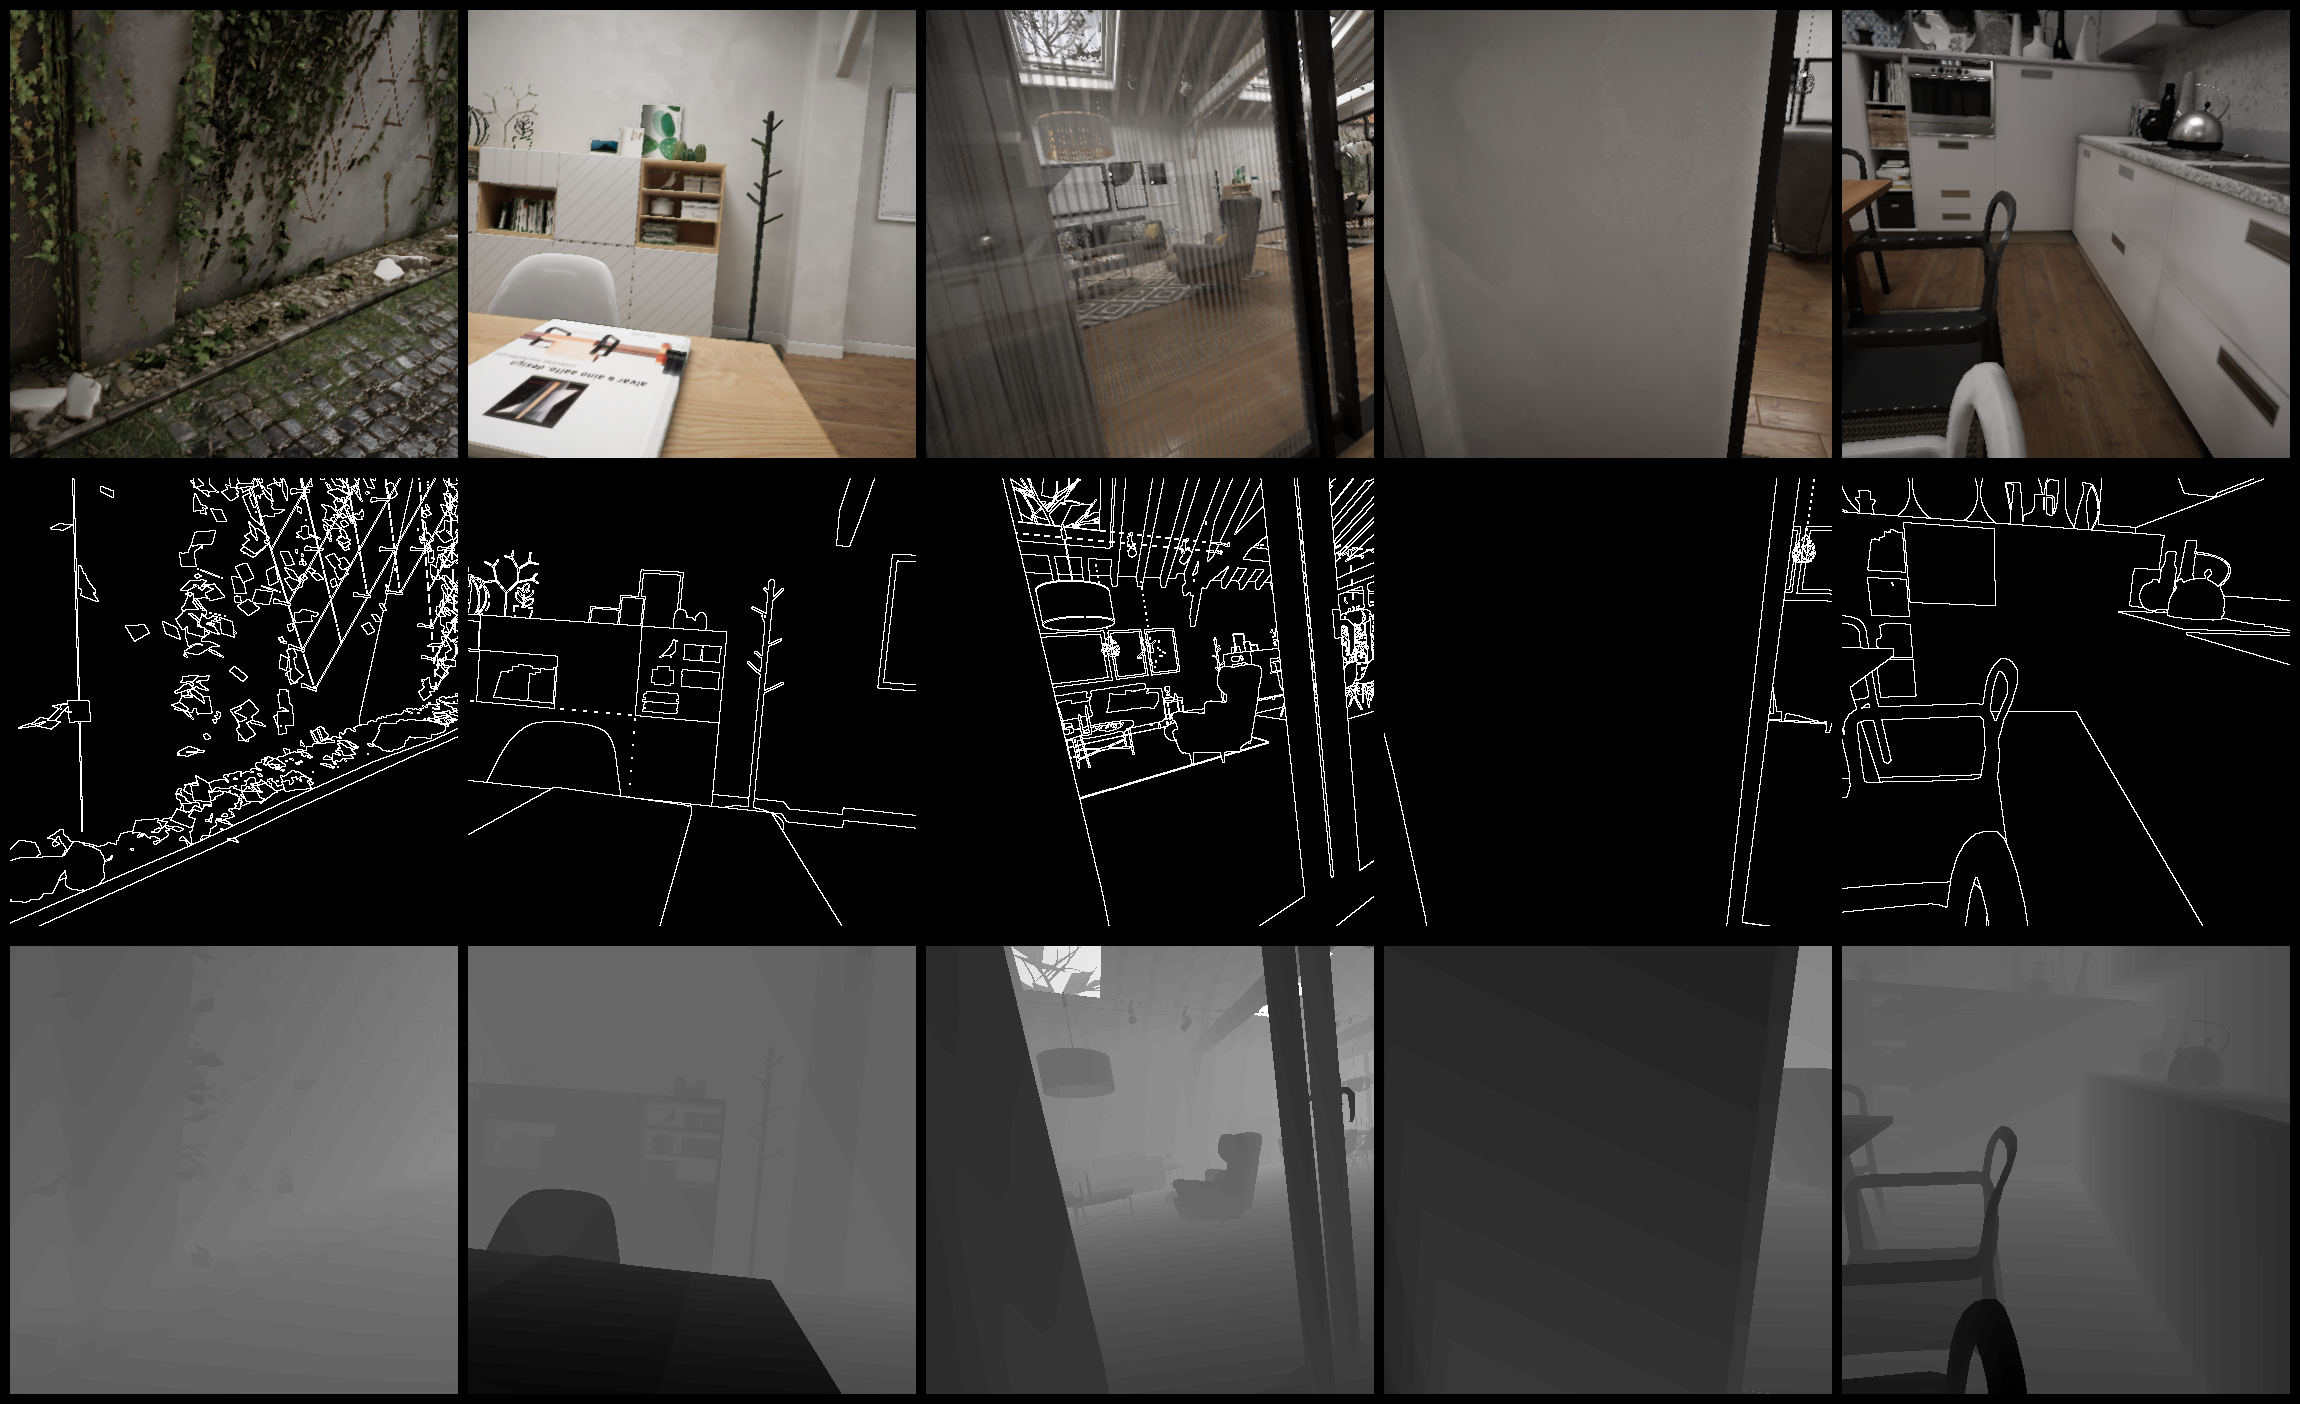

In [12]:
for batch in unitydatamodule.train_dataloader():
    pil_image = convert_to_pil_image(batch)
    break

pil_image

# NYUDv2

In [6]:
from nyudv2 import NYUDv2Dataset, NYUDv2DataModule

In [7]:
nyudv2dataset = NYUDv2Dataset(data_root=r'C:\Users\appel\Documents\Project\synthetic-image-segmentation\data\real\nyudv2', size=(448, 448))
nyudv2dataset.setup()
nyudv2datamodule = NYUDv2DataModule(nyudv2dataset, batch_size=5, num_workers=0, shuffle=True)

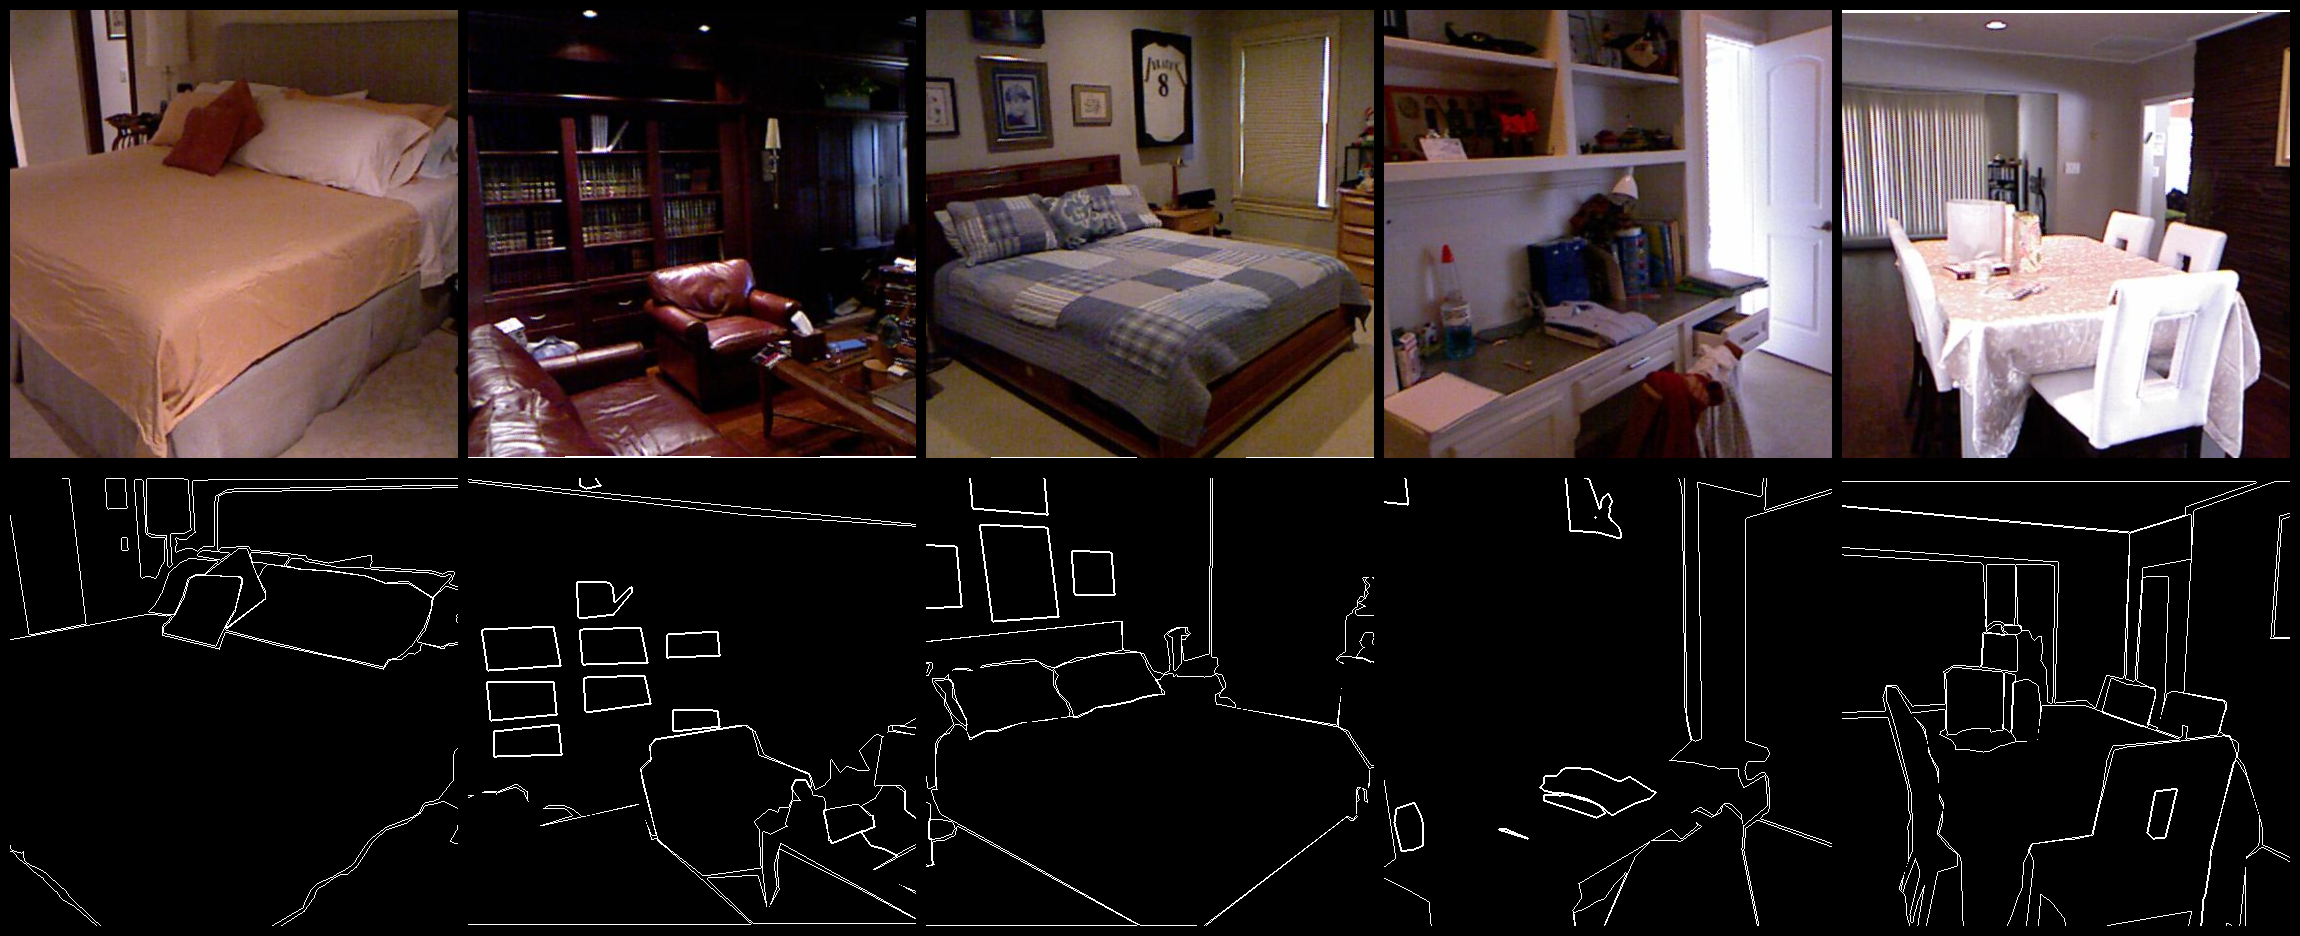

In [8]:
for batch in nyudv2datamodule.train_dataloader():
    pil_image = convert_to_pil_image(batch)
    break

pil_image

# BDSD500

In [9]:
from bdsd500 import BDSD500Dataset, BDSD500DataModule

In [10]:
bdsd500dataset = BDSD500Dataset(data_root=r'C:\Users\appel\Documents\Project\synthetic-image-segmentation\data\real\bdsd500', size=(321, 321))
bdsd500dataset.setup()
bdsd500datamodule = BDSD500DataModule(bdsd500dataset, batch_size=5, num_workers=0, shuffle=True)

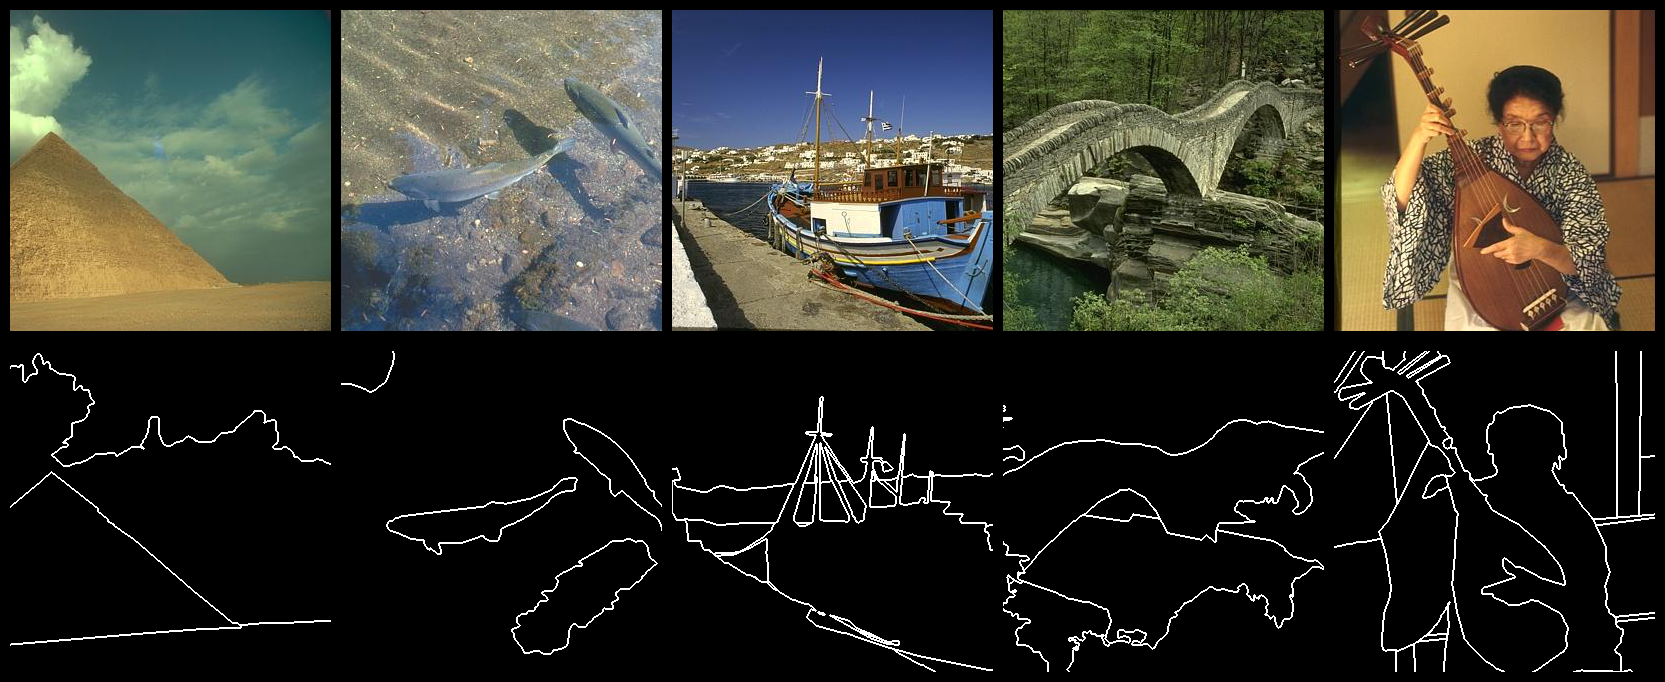

In [11]:
for batch in bdsd500datamodule.train_dataloader():
    pil_image = convert_to_pil_image(batch)
    break

pil_image